# Poojitha_Gujjula_070423

## Table of contents

> **1.Load and read the train and test data**

> **2.Data preprocessing of train and test data**

> **3.Model:1 Baseline models -> Fitted multiple classification models using k-fold cross-validation on the training data(Imbalanced data)**
     
> **4.Model:2 Balanced the data and again fitted the models to check which model is performing better**

> **5.Feature Selection: Information Value/Weight of Evidence Analysis**

> **6.Model:3 Applied Clasification models on those selected IV features after balancing them**

> **7.Feature Reduction: Lasso/Ridge Regularization, Variance Inflation Factor**

> **8.Model:4 Applied models on features after VIF**

> **9.Performance Metrics of Final Model and Interpretation**

> **10.Predicting the probability of target being 1 on Out of Time data**

## 1) IMPORTING REQUIRED LIBRARIES & READING THE DATA

In [277]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#to disable warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression

#import ensemble for bagging
import sklearn.ensemble as ensemble 

#import randomforest Classifier
from sklearn.ensemble import RandomForestClassifier 

#import adaboostclassifer
from sklearn.ensemble import AdaBoostClassifier 

#import Decision tree
from sklearn.tree import DecisionTreeClassifier 

from xgboost import XGBClassifier

#import Scoring metric like f1_score, Classification Report
from sklearn.metrics import f1_score,classification_report,roc_auc_score,accuracy_score,recall_score,precision_score

#import cross-validation
from sklearn.model_selection import cross_val_score

#import Grid_Search cv
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
#load and read the train dataset
df_train = pd.read_csv(r"C:\Users\pooji\Downloads\Training_data_Jenfi_assessment_070423.csv")
#df_train()
#Load and read the test dataset
df_test = pd.read_csv(r"C:\Users\pooji\Downloads\Test_data_Jenfi_assessment_070423.csv")

> There are 151 independant variables and 1 dependant (target) variable with 326 data points (Observations)

In [278]:
# Checking for no of rows and columns in the dataset
df_train.shape

(326, 153)

In [279]:
#Checking data types of each variables
df_train.dtypes

Unnamed: 0      int64
M1            float64
M2            float64
M3            float64
M4            float64
               ...   
M148          float64
M149          float64
M150          float64
M151          float64
target          int64
Length: 153, dtype: object

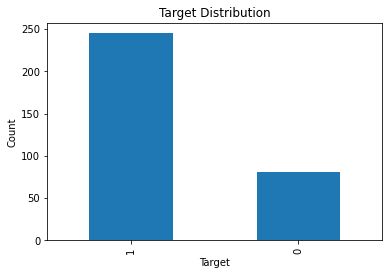

In [282]:
#target class distribution
df_train['target'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

> **We can see that class is imbalanced**

In [283]:
df1_train= df_train.copy()
df2_test= df_test.copy()

# Preprocessing:

## Preprocessing of train data

### MISSISNG VALUE TREATMENT

In [3]:
#checking for null values
null= round(df_train.isnull().sum()/len(df_train),2)

In [4]:
#checking for infinity values
np.isinf(df_train).sum()

Unnamed: 0     0
M1             0
M2             0
M3             0
M4             0
              ..
M148          17
M149          51
M150          22
M151           5
target         0
Length: 153, dtype: int64

In [5]:
#replacing infinity with null values
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
#dropping unnamed column ad target
df_train= df_train.drop(["Unnamed: 0","target"],axis=1)

In [7]:
df_train.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M142,M143,M144,M145,M146,M147,M148,M149,M150,M151
0,2.240789e+08,0.0,0.0,8.142857,1.5,2.857143,2.387105,5.720456e+07,0.0,651246451.0,...,3.306454e+05,0.142857,1.428571,5.943793e+06,3.714286,8.0,1.137554,NaN,8.426000,0.914831
1,5.454261e+06,6138990.0,0.0,5.142857,NaN,0.285714,1.029878,1.694720e+08,0.0,402015474.0,...,2.694206e+06,0.285714,1.285714,4.264630e+06,2.600000,10.0,0.940661,2.000506,NaN,1.016467
2,2.359738e+07,1272552.0,0.0,3.428571,NaN,4.000000,1.103578,1.852271e+07,16.0,124910611.0,...,4.640223e+06,6.714286,9.142857,1.321201e+07,6.500000,13.0,1.007713,0.502552,1.157555,0.988912
3,2.243215e+08,0.0,0.0,3.285714,NaN,10.714286,NaN,1.050155e+06,0.0,1362655.0,...,0.000000e+00,0.000000,6.000000,7.029361e+08,11.500000,0.0,1.504471,2.827495,0.670929,0.483688
4,6.892245e+07,0.0,0.0,3.285714,1.0,1.857143,0.000000,NaN,0.0,400018121.0,...,7.154725e+07,0.000000,0.142857,1.230383e+06,0.833333,2.0,NaN,NaN,NaN,0.600029


## Feature Transformation/Engineering

#### Scaling the data using Min-Max Scalar
Performed MinMax scaling on the data before KNN imputation to ensure that all features are on the same scale, as KNN imputation's distance metric is affected by the scale of the features.

In [8]:
# import module
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
model=scaler.fit(df_train)
scaled_df_train=model.transform(df_train)

# creating a data frame to put into KNN imputer
df_train=pd.DataFrame(scaled_df_train,columns=df_train.columns)
df_train()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M142,M143,M144,M145,M146,M147,M148,M149,M150,M151
0,0.028259,0.000000,0.448374,0.004334,0.166667,0.002694,0.002285,0.103029,0.000000,0.020602,...,0.000098,0.001412,0.010070,0.070286,0.035422,0.5000,0.000006,NaN,0.001820,0.000220
1,0.012651,0.000458,0.448374,0.002737,NaN,0.000269,0.000986,0.111324,0.000000,0.012718,...,0.000795,0.002825,0.009063,0.069952,0.024796,0.6250,0.000005,0.003635,NaN,0.000244
2,0.013946,0.000095,0.448374,0.001825,NaN,0.003772,0.001056,0.100170,0.142857,0.003951,...,0.001369,0.066384,0.064451,0.071729,0.061989,0.8125,0.000006,0.000913,0.000250,0.000237
3,0.028276,0.000000,0.448374,0.001749,NaN,0.010104,NaN,0.098879,0.000000,0.000043,...,0.000000,0.000000,0.042296,0.208745,0.109673,0.0000,0.000008,0.005137,0.000145,0.000116
4,0.017182,0.000000,0.448374,0.001749,0.111111,0.001751,0.000000,NaN,0.000000,0.012655,...,0.021101,0.000000,0.001007,0.069349,0.007947,0.1250,NaN,NaN,NaN,0.000144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0.038856,0.094876,NaN,0.001141,NaN,0.002829,0.000796,0.152836,0.053571,0.060492,...,0.309161,0.029661,0.005035,0.116967,0.044505,0.7500,0.000006,0.000958,0.000074,0.000405
322,0.012586,0.000000,NaN,0.000228,NaN,0.000808,NaN,0.099298,0.000000,0.001872,...,0.000120,0.000000,0.008056,0.069117,0.019074,0.2500,0.000006,NaN,NaN,0.000240
323,0.042778,0.000000,0.448374,0.002509,0.217662,0.006871,0.000784,0.114152,0.116071,0.075196,...,0.017499,0.039548,0.018127,0.257230,0.079473,0.5000,0.000004,0.001783,0.000243,0.000202
324,0.015382,0.000000,NaN,0.000380,NaN,0.000269,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.077543,0.069105,0.009537,0.0000,0.000000,0.001816,NaN,0.000000


### IMPUTING NULL VALUES USING KNN IMPUTATION WITH K=1

In [9]:
#using KNN imputer to impute the data
from sklearn.impute import KNNImputer
import pandas as pd

# Create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=1)

# Fit and transform the DataFrame to impute missing values
df_train_imputed = imputer.fit_transform(df_train)

In [10]:
df_train_imputed = pd.DataFrame(df_train_imputed)

In [11]:
#Inverse transform of Knn Imputed File
df_train_imputed=pd.DataFrame(scaler.inverse_transform(df_train_imputed),columns=df_train.columns)

In [12]:
#df_train_imputed

In [17]:
target = df1_train.target

join= [df_train_imputed,target] 
df_train_imputed = pd.concat(join,axis=1,join='inner')  
df_train_imputed.columns

Index(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10',
       ...
       'M143', 'M144', 'M145', 'M146', 'M147', 'M148', 'M149', 'M150', 'M151',
       'target'],
      dtype='object', length=152)

In [490]:
#df_train_imputed

## Preprocessing of test data

### MISSISNG VALUE TREATMENT

In [53]:
# checking missing data
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
null = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
null.head()

,Total,Percent
M72,255,78.220859
M5,242,74.233129
M36,239,73.312883
M49,229,70.245399
M46,206,63.190184


> Columns which we are dropping from train data need to be dropped in test data

In [54]:
#checking for infinity values
np.isinf(df_test).sum()

Unnamed: 0     0
M1             0
M2             0
M3             0
M4             0
              ..
M148           5
M149          10
M150           9
M151           0
target         0
Length: 153, dtype: int64

In [55]:
#replacing infinity with null values
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [56]:
df_test= df_test.drop(["Unnamed: 0","target"],axis=1)

In [57]:
df_test.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32,M33,M34,M35,M36,M37,M38,M39,M40,M41,M42,M43,M44,M45,M46,M47,M48,M49,M50,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61,M62,M63,M64,M65,...,M87,M88,M89,M90,M91,M92,M93,M94,M95,M96,M97,M98,M99,M100,M101,M102,M103,M104,M105,M106,M107,M108,M109,M110,M111,M112,M113,M114,M115,M116,M117,M118,M119,M120,M121,M122,M123,M124,M125,M126,M127,M128,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144,M145,M146,M147,M148,M149,M150,M151
0,3.728364e+06,0.0,1.399986e+06,2.857143,NaN,6.571429,NaN,2.774900e+04,0.0,1.277520e+05,10853006.0,NaN,2.857143,2.0,0,0.000000,8.0,7.428571,3.857143,0.000000e+00,0.0,0.000000,2.378666e+07,0.0,4200000.0,3,4,1.560000,0.0,115918.0,42017.0,5.853168e+13,4.0,NaN,6.0,NaN,0.285714,0.0,NaN,1516623.5,NaN,NaN,1.0,0.0,5.018036e+07,4.714286e+06,3,4.614815e+07,33000000.0,27746.0,0.000000e+00,1.0,3.000000,0.0,20.571429,6086005.0,2.128075e+07,1,1.206034e+07,7.000000,-6.443362e+06,2.177592e+13,NaN,1.671429e+07,8.0,...,44000.0,32,4.571429,28775.0,0.0,1.0,3.571429,42017.0,NaN,NaN,NaN,9033544.0,8.408577e+05,0.000000,0.000000e+00,NaN,NaN,3.285714,1.833333,0.0,NaN,0.5,1.0,2.796102e+06,0.000000e+00,2.877500e+04,NaN,1.142857,1.626117e+07,0.000000e+00,0.000000e+00,2.142857,1.619399e+07,3.215477e+06,4.442623,1.495751e+07,4747051.0,21.0,0.000000,1.856550e+06,1.665730,1,0.0,0.0,2.428571,190000.0,0.500000,0.142857,4665875.0,116433433.0,NaN,2.142857,1.714286,5.714286,0.0,0.000000e+00,0.142857,1.714286,5.551383e+06,2.571429,1.0,1.032424,0.732185,0.985438,0.048041
1,2.338423e+06,1526173.0,NaN,1.857143,NaN,3.428571,NaN,1.636418e+06,0.0,2.368034e+07,0.0,6.300000e+07,0.428571,7.0,2,2.000000,3.0,1.285714,2.000000,8.764371e+06,2.0,2.000000,4.803452e+06,100000000.0,NaN,2,2,2.128205,0.0,NaN,1000000.0,5.139768e+14,NaN,0.925216,0.0,NaN,0.714286,0.0,NaN,NaN,6.0,32.0,9.0,8.0,2.507640e+07,NaN,1,2.749027e+06,NaN,1004341.0,5.966958e+06,NaN,2.000000,0.0,11.066667,4601980.0,6.142857e+06,0,1.284518e+06,4.000000,-2.153286e+05,3.112605e+11,-1393400.0,NaN,5.0,...,-384.0,65,0.714286,5195570.5,2.0,8.0,1.142857,1000000.0,0.989342,0.750000,1.262449e+06,0.0,1.510695e+06,0.571429,3.667040e+06,1.389384e+11,1.200000,1.714286,0.666667,2.0,2.553571,1.5,1.0,1.750420e+06,1.599992e+06,1.024418e+07,26.0,0.571429,2.819764e+06,5.955433e+06,6.962011e+06,0.571429,2.471720e+06,1.039070e+06,1.727273,1.732082e+06,1528938.0,0.0,1.000000,6.482270e+06,1.940000,0,1.0,2.0,1.428571,2476329.0,0.584980,1.000000,2476329.0,0.0,1656758.0,0.571429,1.285714,1.571429,0.0,1.553804e+07,0.714286,0.285714,2.197055e+06,1.500000,11.0,0.933704,0.996820,NaN,1.034571
2,5.778643e+07,0.0,0.000000e+00,2.000000,NaN,1.714286,NaN,NaN,0.0,5.180000e+05,0.0,0.000000e+00,3.428571,1.0,0,0.000000,6.0,5.428571,2.285714,7.857143e+03,2.0,0.000000,2.296667e+08,0.0,NaN,0,1,3.634146,0.0,1483401.0,1016224.0,5.155113e+15,1.0,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,4.0,0.0,4.0,7.084429e+06,0.000000e+00,1,1.674969e+09,NaN,299000.0,0.000000e+00,0.0,NaN,45029428.0,2.266667,178852812.0,8.644455e+06,1,1.737371e+09,1.714286,6.808786e+06,1.837372e+15,NaN,3.571429e+07,13.0,...,55000.0,60,1.714286,67050631.0,1.0,1.0,2.142857,1016224.0,NaN,NaN,NaN,30812829.0,8.002437e+07,0.142857,4.904116e+07,NaN,NaN,1.000000,1.500000,0.0,0.250000,0.5,NaN,5.740487e+07,4.271429e+04,3.555405e+07,NaN,0.428571,1.546802e+07,0.000000e+00,4.498000e+05,0.285714,3.666282e+07,2.748350e+07,1.620690,1.566483e+07,6625759.0,22.0,1.285714,1.126063e+06,3.616822,0,1.0,0.0,2.571429,20189428.0,0.500000,0.000000,82483401.0,12136000.0,NaN,1.285714,1.428571,0.714286,75512523.0,9.131163e+06,0.000000,1.000000,1.070932e+07,0.500000,1.0,3.685500,1.111475,0.910898,1.730498
3,2.036687e+08,0.0,0.000000e+00,2.000000,NaN,2.714286,NaN,9.079382e+07,9.0,5.140875e+08,31998505.0,5.007902e+08,1.428571,20.0,0,2.142857,21.0,3.571429,2.571429,4.640077e+07,0.0,1.000000,6.422081e+07,43854895.0,20000000.0,9,0,0.344681,134000132.0,86230848.0,2410701.0,3.171

## Feature Transformation/Engineering

#### Scaling the data using Min-Max Scalar

In [58]:
# import module
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
model=scaler.fit(df_test)
scaled_df_test=model.transform(df_test)

# creating a data frame to put into KNN imputer
df_test=pd.DataFrame(scaled_df_test,columns=df_test.columns)
df_test

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32,M33,M34,M35,M36,M37,M38,M39,M40,M41,M42,M43,M44,M45,M46,M47,M48,M49,M50,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61,M62,M63,M64,M65,...,M87,M88,M89,M90,M91,M92,M93,M94,M95,M96,M97,M98,M99,M100,M101,M102,M103,M104,M105,M106,M107,M108,M109,M110,M111,M112,M113,M114,M115,M116,M117,M118,M119,M120,M121,M122,M123,M124,M125,M126,M127,M128,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144,M145,M146,M147,M148,M149,M150,M151
0,0.165297,0.000000,0.007310,0.136054,NaN,0.142415,NaN,0.044358,0.000000,0.000001,0.055411,NaN,0.160,0.009709,0.000000,0.000000,0.056,0.127451,0.126168,0.000000,0.000000,0.000000,0.059037,0.000000,0.020896,0.046154,0.040816,0.215172,0.000000,0.000177,0.000143,0.000006,0.083333,NaN,4.615261e-07,NaN,0.002829,0.000000,NaN,0.000299,NaN,NaN,0.066667,0.000000,0.005942,0.002306,0.045455,0.006796,0.111864,0.400547,0.048872,0.083333,0.545455,0.000000,0.012223,0.000191,0.001228,0.052632,0.004892,0.158576,0.462857,1.543597e-08,NaN,0.009931,0.062500,...,0.559381,0.192547,0.054889,0.000000,0.00,0.066667,0.046468,0.000130,NaN,NaN,NaN,0.000996,0.000112,0.000000,0.000000,NaN,NaN,0.037829,0.021605,0.000000,NaN,0.005952,0.010101,0.131050,0.124341,0.022081,NaN,0.012232,0.003789,0.018387,0.105363,0.026316,0.003086,0.000406,0.048174,0.002995,0.001123,0.954545,0.000000,0.000372,0.195025,0.010417,0.000000,0.000000,0.030909,0.000000,0.001961,0.001799,0.000234,0.082142,NaN,0.022255,0.022222,0.068611,0.032930,0.000000,0.001541,0.020202,0.001009,0.031802,0.066667,0.000030,0.010525,0.000115,0.000000
1,0.164408,0.000875,NaN,0.088435,NaN,0.074303,NaN,0.044633,0.000000,0.000601,0.053411,0.001036,0.024,0.058252,0.090909,0.128440,0.016,0.022059,0.065421,0.001486,0.024096,0.134615,0.055487,0.010751,NaN,0.030769,0.020408,0.293546,0.000000,NaN,0.003410,0.000050,NaN,1.852666e-08,0.000000e+00,NaN,0.007072,0.000000,NaN,NaN,0.031915,0.211921,0.600000,0.533333,0.002969,NaN,0.015152,0.005667,NaN,0.401851,0.050445,NaN,0.363636,0.000000,0.006576,0.000138,0.000355,0.000000,0.000521,0.090615,0.467850,2.205454e-10,0.998366,NaN,0.035714,...,0.559102,0.397516,0.008576,0.000643,0.04,0.533333,0.014870,0.003097,3.013948e-04,0.007778,0.000178,0.000000,0.000201,0.007018,0.000516,4.632732e-09,0.014660,0.019737,0.007856,0.036364,0.007475,0.017857,0.010101,0.130504,0.125236,0.023574,0.155689,0.006116,0.000657,0.018941,0.109153,0.007018,0.000471,0.000131,0.015274,0.000347,0.000362,0.000000,0.011765,0.001312,0.229642,0.000000,0.015625,0.026667,0.018182,0.000116,0.002295,0.012590,0.000122,0.059172,0.000322,0.005935,0.016667,0.018868,0.032930,0.001858,0.007704,0.003367,0.000399,0.018551,0.733333,0.000027,0.014329,NaN,0.006330
2,0.199866,0.000000,0.000000,0.095238,NaN,0.037152,NaN,NaN,0.000000,0.000011,0.053411,0.000000,0.192,0.000000,0.000000,0.000000,0.040,0.093137,0.074766,0.000001,0.024096,0.000000,0.097537,0.000000,NaN,0.000000,0.010204,0.501262,0.000000,0.002791,0.003465,0.000500,0.020833,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.026490,0.000000,0.266667,0.000839,0.000000,0.015152,0.049165,NaN,0.400910,0.048872,0.000000,NaN,0.005041,0.001347,0.006348,0.000499,0.052632,0.704746,0.038835,0.473481,1.302439e-06,NaN,0.021219,0.107143,...,0.559451,0.366460,0.020583,0.008335,0.02,0.066667,0.027881,0.003147,NaN,NaN,NaN,0.003396,0.010646,0.001754,0.006906,NaN,NaN,0.011513,0.017677,0.000000,0.000732,0.005952,NaN,0.159576,0.124365,0.027273,NaN,0.004587,0.003604,0.018387,0.105608,0.003509,0.006987,0.003471,0.013983,0.003137,0.001567,1.000000,0.015126,0.000223,0.441284,0.000000,0.015625,0.000000,0.032727,0.001019,0.001961,0.000000,0.004198,0.061566,NaN,0.013353,0.018519,0.008576,0.041960,0.001092,0.000000,0.011785,0.001946,0.006184,0.066667,0.000107,0.015978,0.000107,0.010795
3,0.293155,0.000000,0.000000,0.095238,NaN,0.058824,NaN,0.059858,0.115385,0.013079,0.059307,0.008233,0.080,0.184466,0.000000,0.137615,0.160,0.061275,0.084112,0.007

### IMPUTING NULL VALUES USING KNN IMPUTATION WITH K=1

In [59]:
#using KNN imputer to impute the data
from sklearn.impute import KNNImputer
import pandas as pd

# Create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=1)

# Fit and transform the DataFrame to impute missing values
df_test_imputed = imputer.fit_transform(df_test)

In [60]:
df_test_imputed = pd.DataFrame(df_test_imputed)

In [61]:
#Inverse transform of Knn Imputed File
df_test_imputed=pd.DataFrame(scaler.inverse_transform(df_test_imputed),columns=df_test.columns)

In [491]:
#df_train_imputed

In [63]:
target = df1_test.target

join= [df_test_imputed,target] 
df_test_imputed = pd.concat(join,axis=1,join='inner')  
df_test_imputed.columns

Index(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10',
       ...
       'M143', 'M144', 'M145', 'M146', 'M147', 'M148', 'M149', 'M150', 'M151', 'target'], dtype='object', length=152)

# MODEL FITTING

### BASE LINE MODEL - WITH IMBALANCED DATA
**Fitted multiple classification models using k-fold cross-validation on the training data**

In [18]:
X_train = df_train_imputed.drop(["target"],axis=1)  #predictors, dropping y column (Target)
y_train = df_train_imputed["target"]                # y as target column

## LOGISTIC REGRESSION

In [29]:
# create a logistic regression model
lr = LogisticRegression(random_state=10)

# fit the model on the training data
lr.fit(X_train, y_train)

# Performance check using cross validation technique
scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='f1')

#Print the f1 score
print("F1 score using 10-fold Cross Validation:", np.mean(scores))

F1 score using 10-fold Cross Validation: 0.0


## DECISION TREE CLASSIFIER

In [30]:
#Fitting Decision tree classifier Model
dt = DecisionTreeClassifier(random_state=10)

# Performance check using cross validation technique
scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='f1')

#Print the f1 score
print("F1 score using 10-fold Cross Validation:", np.mean(scores))

F1 score using 10-fold Cross Validation: 0.802021926331842


## RANDOM FOREST CLASSIFIER

In [31]:
rand_forest = RandomForestClassifier(random_state=10)
rand_forest.fit(X_train,y_train)

# Performance check using cross validation technique
scores = cross_val_score(rand_forest, X_train, y_train, cv=10, scoring='f1')

#Print the f1 score
print("F1 score using 10-fold Cross Validation:", np.mean(scores))

F1 score using 10-fold Cross Validation: 0.864827667632154


## ADABOOST

In [33]:
#Fitting adaboost tree classifier Model
ada_boost = AdaBoostClassifier(random_state=10)
ada_boost.fit(X_train, y_train)

# Performance check using cross validation technique
scores = cross_val_score(ada_boost, X_train, y_train, cv=10, scoring='f1')

#Print the f1 score
print("F1 score using 10-fold Cross Validation:", np.mean(scores))

F1 score using 10-fold Cross Validation: 0.8234120820204958


## XGBOOST

In [34]:
#Fitting XGBOOST classifier Model
xg = XGBClassifier(random_state=10)
xg.fit(X_train,y_train)

# Performance check using cross validation technique
scores = cross_val_score(xg, X_train, y_train, cv=10, scoring='f1')

#Print the f1 score
print("F1 score using 10-fold Cross Validation:", np.mean(scores))

F1 score using 10-fold Cross Validation: 0.8615705539286764


### MODEL -2 : WITH BALANCED DATA

> **Balancing the imbalanced target class using SMOTE**
    
  **SMOTE generates synthetic examples of the minority class to balance the class distribution in imbalanced data.**

In [36]:
#import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=1,random_state = 10)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

## LOGISTIC REGRESSION

In [38]:
# create a logistic regression model on balanced data
lr = LogisticRegression(random_state=10)

# fit the model on the training data
lr.fit(X_train_sm, y_train_sm)

# Performance check using cross validation technique
scores = cross_val_score(lr, X_train_sm, y_train_sm, cv=10, scoring='f1')

#Print the f1 score
print("F1 score using 10-fold Cross Validation:", np.mean(scores))

F1 score using 10-fold Cross Validation: 0.0


## DECISION TREE CLASSIFIER

In [39]:
#Fitting Decision tree classifier Model on balanced data
dt = DecisionTreeClassifier(random_state=10)

# Performance check using cross validation technique
scores = cross_val_score(dt, X_train_sm, y_train_sm, cv=10, scoring='f1')

#Print the f1 score
print("F1 score using 10-fold Cross Validation:", np.mean(scores))

F1 score using 10-fold Cross Validation: 0.7683669464038794


## RANDOM FOREST CLASSIFIER

In [40]:
#fitting random forest classifier model on balanced data
rand_forest = RandomForestClassifier(random_state=10)

# Performance check using cross validation technique
scores = cross_val_score(rand_forest, X_train_sm, y_train_sm, cv=10, scoring='f1')

#Print the f1 score
print("F1 score using 10-fold Cross Validation:", np.mean(scores))

F1 score using 10-fold Cross Validation: 0.854633115278974


## ADABOOST

In [41]:
#Fitting adaboost tree classifier Model on balanced data
ada_boost = AdaBoostClassifier(random_state=10)

# Performance check using cross validation technique
scores = cross_val_score(ada_boost, X_train_sm, y_train_sm, cv=10, scoring='f1')

#Print the f1 score
print("F1 score using 10-fold Cross Validation:", np.mean(scores))

F1 score using 10-fold Cross Validation: 0.8361580908164757


## XGBOOST

In [42]:
#Fitting XGBOOST classifier Model on balanced data
xg = XGBClassifier(random_state=10)

# Performance check using cross validation technique
scores = cross_val_score(xg, X_train_sm, y_train_sm, cv=10, scoring='f1')

#Print the f1 score
print("F1 score using 10-fold Cross Validation:", np.mean(scores))

F1 score using 10-fold Cross Validation: 0.8641711337106337


## Feature Selection: Information Value/Weight of Evidence Analysis

**Information Value (IV) or Weight of Evidence (WoE) is used to evaluate the predictive power of a feature in a binary classification problem by measuring the strength of its association with the target variable.**

In [44]:
#!pip install monotonic-binning
#import monotonic binning to automatically calculate IV values for numeric values
from monotonic_binning.monotonic_woe_binning import Binning

In [46]:
#Side by Side boxplot
numeric = df_train_imputed.select_dtypes(exclude="object")
numeric = numeric.drop(["target"],axis=1)
# numeric

In [547]:
#bin_object.woe_summary

In [48]:
woe={}
iv={}          
for i in numeric:
    var = i     
    y_var = "target" 

    bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    bin_object.fit(df_train_imputed[[y_var, var]])

    # Print WOE summary
    print(i,": ",np.sum(bin_object.woe_summary['IV_components']))
    iv[i]=(np.sum(bin_object.woe_summary['IV_components']))
    woe[f'woe_{i}'] = bin_object.woe_summary

M1 :  0.0
M2 :  0.0
M3 :  0.0
M4 :  0.0
M5 :  0.05555369208183761
M6 :  0.0
M7 :  0.008161856555665627
M8 :  0.0
M9 :  0.0
M10 :  0.0
M11 :  0.0
M12 :  0.005176777598298434
M13 :  0.0
M14 :  0.0
M15 :  0.198591166165609
M16 :  0.0
M17 :  0.0
M18 :  0.0
M19 :  0.0
M20 :  0.0
M21 :  0.0
M22 :  0.0
M23 :  0.0
M24 :  0.0
M25 :  0.1358197042673053
M26 :  0.0
M27 :  0.0
M28 :  0.3326202083411199
M29 :  0.0
M30 :  0.0
M31 :  0.0
M32 :  0.0
M33 :  0.0
M34 :  0.019896293382308184
M35 :  0.0
M36 :  0.0
M37 :  0.0
M38 :  0.0
M39 :  0.0
M40 :  0.0
M41 :  0.0
M42 :  0.0
M43 :  0.0
M44 :  0.0
M45 :  0.0
M46 :  0.0
M47 :  0.0
M48 :  0.0
M49 :  0.0
M50 :  0.0
M51 :  0.0
M52 :  0.0
M53 :  0.16427143831202237
M54 :  0.0
M55 :  0.0
M56 :  0.0
M57 :  0.0
M58 :  0.05674508903695746
M59 :  0.0
M60 :  0.0
M61 :  0.0
M62 :  0.0
M63 :  0.5115827291459275
M64 :  0.0
M65 :  0.0
M66 :  0.32165827407538605
M67 :  0.0
M68 :  0.0
M69 :  0.18546617153585138
M70 :  0.0
M71 :  0.0
M72 :  0.025550278501137592
M73 :  0.0

>**Features with an IV value above the threshold of 0.01 were selected for analysis.**

In [198]:
X_train_woe = df_train_imputed[['M5','M15','M25','M28','M34','M53','M58','M63','M66','M69','M72','M87','M88','M124','M127','M148','M149','M150','M151']]
y_train_woe = df_train_imputed["target"]   

>**The set of features selected from the training data based on the IV threshold of 0.01 was also used to filter the features in the test data to ensure consistency in the feature space between the two datasets.**

In [195]:
X_test = df_test_imputed[['M5','M15','M25','M28','M34','M53','M58','M63','M66','M69','M72','M87','M88','M124','M127','M148','M149','M150','M151']]
#predictors, dropping y column (Target)
y_test = df_test_imputed["target"]  

## MODEL FITTING -IMBALANCED DATA

#### Based on the results of k-fold cross validation, where the selected features were used to fit various models including Random Forest Classifier, AdaBoost, and XGBoost, and achieved good F1 scores, these models were selected to validate the test data.

>**selected features were used to fit the models for the analysis**

## RANDOM FOREST CLASSIFIER

In [67]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train_woe,y_train_woe)
y_pred_rf = rand_forest.predict(X_test)

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_rf,pos_label=0)
recall = recall_score(y_test, y_pred_rf,pos_label=0)
f1 = f1_score(y_test, y_pred_rf,pos_label=0)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

# calculate AUROC
auroc = roc_auc_score(y_test, y_pred_rf)
print("AUROC: {:.2f}".format(auroc))

#printing classification report
print(classification_report(y_test,y_pred_rf))

Precision: 0.86
Recall: 0.48
F1 score: 0.62
AUROC: 0.72
              precision    recall  f1-score   support

           0       0.86      0.48      0.62        25
           1       0.82      0.97      0.89        63

    accuracy                           0.83        88
   macro avg       0.84      0.72      0.75        88
weighted avg       0.83      0.83      0.81        88



## ADABOOST

In [69]:
#Fitting adaboost tree classifier Model
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train_woe,y_train_woe)

# make predictions on the testing data
y_pred_ada = ada_boost.predict(X_test)

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_ada,pos_label=0)
recall = recall_score(y_test, y_pred_ada,pos_label=0)
f1 = f1_score(y_test, y_pred_ada,pos_label=0)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

# calculate AUROC
auroc = roc_auc_score(y_test, y_pred_ada)
print("AUROC: {:.2f}".format(auroc))

#printing classification report
print(classification_report(y_test,y_pred_ada))

Precision: 0.78
Recall: 0.56
F1 score: 0.65
AUROC: 0.75
              precision    recall  f1-score   support

           0       0.78      0.56      0.65        25
           1       0.84      0.94      0.89        63

    accuracy                           0.83        88
   macro avg       0.81      0.75      0.77        88
weighted avg       0.82      0.83      0.82        88



## XGBOOST

In [70]:
#Fitting XGBOOST classifier Model
xg = XGBClassifier()
xg.fit(X_train_woe,y_train_woe)

# make predictions on the testing data
y_pred_xg = xg.predict(X_test)

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_xg,pos_label=0)
recall = recall_score(y_test, y_pred_xg,pos_label=0)
f1 = f1_score(y_test, y_pred_xg,pos_label=0)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

# calculate AUROC
auroc = roc_auc_score(y_test, y_pred_xg)
print("AUROC: {:.2f}".format(auroc))

#printing classification report
print(classification_report(y_test,y_pred_xg))

Precision: 0.67
Recall: 0.48
F1 score: 0.56
AUROC: 0.69
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        25
           1       0.81      0.90      0.86        63

    accuracy                           0.78        88
   macro avg       0.74      0.69      0.71        88
weighted avg       0.77      0.78      0.77        88



## Model - 4 : Balanced Data

In [199]:
#import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=1,random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_woe, y_train_woe.ravel())

## RANDOM FOREST CLASSIFIER

In [88]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train_sm, y_train_sm)
y_pred_rf = rand_forest.predict(X_test)

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_rf,pos_label=0)
recall = recall_score(y_test, y_pred_rf,pos_label=0)
f1 = f1_score(y_test, y_pred_rf,pos_label=0)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

# calculate AUROC
auroc = roc_auc_score(y_test, y_pred_rf)
print("AUROC: {:.2f}".format(auroc))

#printing classification report
print(classification_report(y_test,y_pred_rf))

Precision: 0.70
Recall: 0.64
F1 score: 0.67
AUROC: 0.76
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        25
           1       0.86      0.89      0.88        63

    accuracy                           0.82        88
   macro avg       0.78      0.76      0.77        88
weighted avg       0.81      0.82      0.82        88



## ADABOOST

In [89]:
#Fitting adaboost tree classifier Model
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train_sm, y_train_sm)

# make predictions on the testing data
y_pred_ada = ada_boost.predict(X_test)

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_ada,pos_label=0)
recall = recall_score(y_test, y_pred_ada,pos_label=0)
f1 = f1_score(y_test, y_pred_ada,pos_label=0)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

# calculate AUROC
auroc = roc_auc_score(y_test, y_pred_ada)
print("AUROC: {:.2f}".format(auroc))

#printing classification report
print(classification_report(y_test,y_pred_ada))

Precision: 0.66
Recall: 0.76
F1 score: 0.70
AUROC: 0.80
              precision    recall  f1-score   support

           0       0.66      0.76      0.70        25
           1       0.90      0.84      0.87        63

    accuracy                           0.82        88
   macro avg       0.78      0.80      0.79        88
weighted avg       0.83      0.82      0.82        88



## XGBOOST

In [90]:
#Fitting XGBOOST classifier Model
xg = XGBClassifier()
xg.fit(X_train_sm, y_train_sm)

# make predictions on the testing data
y_pred_xg = xg.predict(X_test)

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_xg,pos_label=0)
recall = recall_score(y_test, y_pred_xg,pos_label=0)
f1 = f1_score(y_test, y_pred_xg,pos_label=0)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

# calculate AUROC
auroc = roc_auc_score(y_test, y_pred_xg)
print("AUROC: {:.2f}".format(auroc))

#printing classification report
print(classification_report(y_test,y_pred_xg))

Precision: 0.62
Recall: 0.64
F1 score: 0.63
AUROC: 0.74
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        25
           1       0.85      0.84      0.85        63

    accuracy                           0.78        88
   macro avg       0.74      0.74      0.74        88
weighted avg       0.79      0.78      0.79        88



## Hyperparameter tuning of random forest classifier
>I did hyperparameter tuning using GridSearchCV which is popular hyperparameter tuning technique used for optimizing machine learning models as it exhaustively searches over a pre-defined hyperparameter grid, making it more comprehensive than other tuning methods such as random search or manual tuning.

In [75]:
# # define the hyperparameter space
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [2,4,6,8,10,12,14,16],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
 }

# # instantiate the Random Forest Classifier
rfc = RandomForestClassifier()

# # define the GridSearchCV object with cross-validation
grid_search = GridSearchCV(
    rfc, 
    param_grid=param_grid, 
    cv=5
 )

# # fit the GridSearchCV object to the data
grid_search.fit(X_train_sm, y_train_sm)

# # print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
Best Hyperparameters: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

#### Fitted Random foresr model after hyperparameter tuning using Gridsearch CV

In [76]:
rand_forest = RandomForestClassifier(max_depth = 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300)
rand_forest.fit(X_train_sm, y_train_sm)
y_pred_rf = rand_forest.predict(X_test)

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_rf,pos_label=0)
recall = recall_score(y_test, y_pred_rf,pos_label=0)
f1 = f1_score(y_test, y_pred_rf,pos_label=0)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

# calculate AUROC
auroc = roc_auc_score(y_test, y_pred_rf)
print("AUROC: {:.2f}".format(auroc))

#printing classification report
print(classification_report(y_test,y_pred_rf))

Precision: 0.68
Recall: 0.60
F1 score: 0.64
AUROC: 0.74
              precision    recall  f1-score   support

           0       0.68      0.60      0.64        25
           1       0.85      0.89      0.87        63

    accuracy                           0.81        88
   macro avg       0.77      0.74      0.75        88
weighted avg       0.80      0.81      0.80        88



## Hyperparameter tuning of Xgboost

In [78]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5]
}

# Define XGBClassifier model
model = XGBClassifier()

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_sm, y_train_sm)

# Print the best hyperparameters and corresponding score
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")


Best score: 0.8653061224489796
Best parameters: {'max_depth': 5, 'n_estimators': 100}


In [79]:
#Fitting XGBOOST classifier Model
xg = XGBClassifier(max_depth=5,n_estimators=100)
xg.fit(X_train_sm, y_train_sm)

# make predictions on the testing data
y_pred_xg = xg.predict(X_test)

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_xg,pos_label=0)
recall = recall_score(y_test, y_pred_xg,pos_label=0)
f1 = f1_score(y_test, y_pred_xg,pos_label=0)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

# calculate AUROC
auroc = roc_auc_score(y_test, y_pred_xg)
print("AUROC: {:.2f}".format(auroc))

#printing classification report
print(classification_report(y_test,y_pred_xg))

Precision: 0.64
Recall: 0.64
F1 score: 0.64
AUROC: 0.75
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        25
           1       0.86      0.86      0.86        63

    accuracy                           0.80        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.80      0.80      0.80        88



## Feature Reduction:

# VIF
>Variance Inflation Factor (VIF) is used to identify and remove highly correlated features from a dataset to prevent multicollinearity in a regression model, and this process helps to improve the stability and interpretability of the model.

>Although VIF is primarily used for regression models, it can also be used in classification problems to identify and remove highly correlated features that may affect the performance and interpretability of the model.

**Did VIF on IV(information value) features to check which features are highly correlated**

In [154]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_woe.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_woe.values, i)
                          for i in range(len(X_train_woe.columns))]
  
print(vif_data)

   feature        VIF
0       M5   2.258234
1      M15   9.495633
2      M25   1.779247
3      M28  13.634026
4      M34   1.094080
5      M53   1.595883
6      M58   8.956215
7      M63   1.378619
8      M66   1.295260
9      M69  11.686293
10     M72   1.279651
11     M87   1.264775
12     M88   8.940617
13    M124   2.033934
14    M127  13.236274
15    M148   1.027130
16    M149   1.033049
17    M150   1.050956
18    M151   1.174557


**>Features with a VIF score greater than 5 were identified and dropped from the dataset**


**>As M28 has high VIF score i am dropping that feature from the data frame and we repeat the same process of dropping the feature one by one until we get the features with VIF score less than 5**

In [155]:
X_train_woe_vif = X_train_woe.drop(['M28'],axis=1)

In [156]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_woe_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_woe_vif.values, i)
                          for i in range(len(X_train_woe_vif.columns))]
  
print(vif_data)

   feature        VIF
0       M5   2.254635
1      M15   9.432948
2      M25   1.752344
3      M34   1.090109
4      M53   1.475731
5      M58   8.803379
6      M63   1.378256
7      M66   1.284265
8      M69  11.674109
9      M72   1.278480
10     M87   1.263828
11     M88   8.925818
12    M124   2.031727
13    M127   3.009498
14    M148   1.024896
15    M149   1.032471
16    M150   1.050788
17    M151   1.171779


In [157]:
X_train_woe_vif = X_train_woe_vif.drop(['M69'],axis=1)

In [158]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_woe_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_woe_vif.values, i)
                          for i in range(len(X_train_woe_vif.columns))]
  
print(vif_data)

   feature       VIF
0       M5  2.250666
1      M15  8.594785
2      M25  1.746157
3      M34  1.090087
4      M53  1.475549
5      M58  6.379379
6      M63  1.368195
7      M66  1.284221
8      M72  1.268819
9      M87  1.260584
10     M88  8.033298
11    M124  2.029126
12    M127  3.002144
13    M148  1.024825
14    M149  1.029119
15    M150  1.046209
16    M151  1.170552


In [159]:
X_train_woe_vif = X_train_woe_vif.drop(['M15'],axis=1)

In [160]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_woe_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_woe_vif.values, i)
                          for i in range(len(X_train_woe_vif.columns))]
  
print(vif_data)

   feature       VIF
0       M5  2.137014
1      M25  1.703379
2      M34  1.020571
3      M53  1.459818
4      M58  2.933274
5      M63  1.362859
6      M66  1.282436
7      M72  1.207155
8      M87  1.259010
9      M88  6.005323
10    M124  1.968855
11    M127  2.971247
12    M148  1.021988
13    M149  1.029032
14    M150  1.043545
15    M151  1.167655


In [161]:
X_train_woe_vif = X_train_woe_vif.drop(['M88'],axis=1)

In [162]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_woe_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_woe_vif.values, i)
                          for i in range(len(X_train_woe_vif.columns))]
  
print(vif_data)

   feature       VIF
0       M5  1.871470
1      M25  1.633753
2      M34  1.013651
3      M53  1.458346
4      M58  1.761253
5      M63  1.356771
6      M66  1.261411
7      M72  1.161734
8      M87  1.243576
9     M124  1.913926
10    M127  2.356671
11    M148  1.015510
12    M149  1.026811
13    M150  1.043542
14    M151  1.157417


**And we are dropping those features in test data also**

In [163]:
X_test_vif = X_test.drop(['M15','M28','M69','M88'],axis=1)

In [254]:
X_test_vif.columns

Index(['M5', 'M25', 'M34', 'M53', 'M58', 'M63', 'M66', 'M72', 'M87', 'M124', 'M127', 'M148', 'M149', 'M150', 'M151'], dtype='object')

## BALANCING THE DATA AFTER VIF

In [165]:
#import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=1,random_state = 42)
X_train_sm_vif, y_train_sm_vif = sm.fit_resample(X_train_woe_vif, y_train_woe.ravel())

## LOGISTIC REGRESSION

In [201]:
lr_vif = RandomForestClassifier()
lr_vif.fit(X_train_sm_vif, y_train_sm_vif)
y_pred_rf = lr_vif.predict(X_test_vif)

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_rf,pos_label=0)
recall = recall_score(y_test, y_pred_rf,pos_label=0)
f1 = f1_score(y_test, y_pred_rf,pos_label=0)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

# calculate AUROC
auroc = roc_auc_score(y_test, y_pred_rf)
print("AUROC: {:.2f}".format(auroc))

#printing classification report
print(classification_report(y_test,y_pred_rf))

Precision: 0.60
Recall: 0.60
F1 score: 0.60
AUROC: 0.72
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        25
           1       0.84      0.84      0.84        63

    accuracy                           0.77        88
   macro avg       0.72      0.72      0.72        88
weighted avg       0.77      0.77      0.77        88



## RANDOM FOREST ON BALACED DATA AFTER DOING VIF

In [176]:
rand_forest_vif = RandomForestClassifier()
rand_forest_vif.fit(X_train_sm_vif, y_train_sm_vif)
y_pred_rf = rand_forest_vif.predict(X_test_vif)

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_rf,pos_label=0)
recall = recall_score(y_test, y_pred_rf,pos_label=0)
f1 = f1_score(y_test, y_pred_rf,pos_label=0)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

# calculate AUROC
auroc = roc_auc_score(y_test, y_pred_rf)
print("AUROC: {:.2f}".format(auroc))

#printing classification report
print(classification_report(y_test,y_pred_rf))

Precision: 0.62
Recall: 0.64
F1 score: 0.63
AUROC: 0.74
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        25
           1       0.85      0.84      0.85        63

    accuracy                           0.78        88
   macro avg       0.74      0.74      0.74        88
weighted avg       0.79      0.78      0.79        88



## ADABOOST

In [170]:
#Fitting adaboost tree classifier Model
ada_boost_vif = AdaBoostClassifier()
ada_boost_vif.fit(X_train_sm_vif, y_train_sm)

# make predictions on the testing data
y_pred_ada = ada_boost_vif.predict(X_test_vif)

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_ada,pos_label=0)
recall = recall_score(y_test, y_pred_ada,pos_label=0)
f1 = f1_score(y_test, y_pred_ada,pos_label=0)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

# calculate AUROC
auroc = roc_auc_score(y_test, y_pred_ada)
print("AUROC: {:.2f}".format(auroc))

#printing classification report
print(classification_report(y_test,y_pred_ada))

Precision: 0.61
Recall: 0.76
F1 score: 0.68
AUROC: 0.78
              precision    recall  f1-score   support

           0       0.61      0.76      0.68        25
           1       0.89      0.81      0.85        63

    accuracy                           0.80        88
   macro avg       0.75      0.78      0.76        88
weighted avg       0.81      0.80      0.80        88



## XGBOOST

In [171]:
#Fitting XGBOOST classifier Model
xg_vif = XGBClassifier()
xg_vif.fit(X_train_sm_vif, y_train_sm_vif)

# make predictions on the testing data
y_pred_xg = xg_vif.predict(X_test_vif)

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_xg,pos_label=0)
recall = recall_score(y_test, y_pred_xg,pos_label=0)
f1 = f1_score(y_test, y_pred_xg,pos_label=0)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

# calculate AUROC
auroc = roc_auc_score(y_test, y_pred_xg)
print("AUROC: {:.2f}".format(auroc))

#printing classification report
print(classification_report(y_test,y_pred_xg))

Precision: 0.58
Recall: 0.60
F1 score: 0.59
AUROC: 0.71
              precision    recall  f1-score   support

           0       0.58      0.60      0.59        25
           1       0.84      0.83      0.83        63

    accuracy                           0.76        88
   macro avg       0.71      0.71      0.71        88
weighted avg       0.76      0.76      0.76        88



## LASSO/RIDGE REGULARIZATION

In [200]:
# Define parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l2']}

# Ridge regularization
ridge = LogisticRegression(penalty='l2', solver='lbfgs')
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train_sm, y_train_sm)

# Evaluate models
ridge_preds = ridge_cv.predict(X_test)
ridge_acc = accuracy_score(y_test, ridge_preds)

print('Ridge accuracy:', ridge_acc)
# calculate precision, recall, and F1 score
precision = precision_score(y_test, ridge_preds,pos_label=0)
recall = recall_score(y_test, ridge_preds,pos_label=0)
f1 = f1_score(y_test, ridge_preds,pos_label=0)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

# calculate AUROC
auroc = roc_auc_score(y_test, ridge_preds)
print("AUROC: {:.2f}".format(auroc))

#printing classification report
print(classification_report(y_test,ridge_preds))

Ridge accuracy: 0.6818181818181818
Precision: 0.43
Recall: 0.40
F1 score: 0.42
AUROC: 0.60
              precision    recall  f1-score   support

           0       0.43      0.40      0.42        25
           1       0.77      0.79      0.78        63

    accuracy                           0.68        88
   macro avg       0.60      0.60      0.60        88
weighted avg       0.67      0.68      0.68        88



## Interpretation and Significance of output model and features

>**The final model (AdaBoost) achieved an F1 score of 0.68, indicating a good balance between precision and recall.**

>**The Precision of 0.61 and Recall of 0.76 suggest that the model correctly identified 76% of the positive cases (true positives) and 61% of the predicted positive cases were actually positive (precision).**

>**The AUROC score of 0.78 indicates that the model has good discriminative power to distinguish between positive and negative cases.**

>**The classification report shows that the model has better performance in predicting negative cases than positive cases, which is reflected in the higher precision and lower recall for class 0.** 

>**The overall accuracy of the model is 0.80, which means that the model correctly classified 80% of the cases.**

>**The weighted average F1 score of 0.80 indicates that the model performs well across both classes, with slightly better performance for class 1 due to its higher support.**

>**In addition to the model performance, the significance of the features used in the model should also be considered.**

>**This are the features are used in the final model :'M5', 'M25', 'M34', 'M53', 'M58', 'M63', 'M66', 'M72', 'M87', 'M124', 'M127', 'M148', 'M149', 'M150', 'M151'.**

>**These features have been selected based on their importance and have shown to be relevant in predicting the target variable.** 

>**Therefore, we can conclude that the model is using the appropriate set of features and is giving good predictions.**

# Predicting the probability of target being 1 on Out of Training data

In [256]:
#load and read the out of training data
oot_data = pd.read_csv(r"C:\Users\pooji\Downloads\OOT_data_Jenfi_assessment_070423.csv")

In [232]:
#oot_data.head()

In [257]:
#checking for null values
oot_data.isnull().sum()

Unnamed: 0     0
M1             0
M2             1
M3            35
M4             0
              ..
M147           1
M148           0
M149          20
M150          31
M151           2
Length: 152, dtype: int64

In [258]:
#checking for infinity values
np.isinf(oot_data).sum()

Unnamed: 0     0
M1             0
M2             0
M3             0
M4             0
              ..
M147           0
M148           3
M149          17
M150           7
M151           1
Length: 152, dtype: int64

In [259]:
#replacing infinity with null values
oot_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [260]:
#dropping unnamed column ad target
oot_data= oot_data.drop(["Unnamed: 0"],axis=1)

In [284]:
#oot_data.head()

#### Scaling the data using Min-Max Scalar

In [262]:
# import module
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
model=scaler.fit(oot_data)
scaled_oot_data=model.transform(oot_data)

# creating a data frame to put into KNN imputer
oot_data=pd.DataFrame(scaled_oot_data,columns=oot_data.columns)
#oot_data

#### Imputing null values with KNN imputation

In [263]:
# Create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=1)

# Fit and transform the DataFrame to impute missing values
oot_data_imputed = imputer.fit_transform(oot_data)

In [264]:
#converting imputed oot_data into dataframe
oot_data_imputed = pd.DataFrame(oot_data_imputed)

In [265]:
#Inverse transform of Knn Imputed File
oot_data_imputed=pd.DataFrame(scaler.inverse_transform(oot_data_imputed),columns=oot_data.columns)

In [239]:
#oot_data_imputed

In [267]:
#taking the relevant features same as training data
X_oot = oot_data_imputed[['M5', 'M25', 'M34', 'M53', 'M58', 'M63', 'M66', 'M72', 'M87', 'M124', 'M127', 'M148', 'M149', 'M150', 'M151']]

## Applied the final model on the Out-of-training data set (on relevant features)

In [270]:
# Train the AdaBoost model
model = AdaBoostClassifier()
model.fit(X_train_sm_vif, y_train_sm)

# Use the trained model to predict the target probabilities for the dataset
y_pred_prob = model.predict_proba(X_oot)[:, 1]

# Print the predicted probabilities for each entry in the dataset
print(y_pred_prob)

[0.51493723 0.50557229 0.68496913 0.51994063 0.47345456 0.5039621
 0.5074089  0.48374281 0.52483231 0.5208329  0.67770365 0.51410849
 0.504516   0.48064784 0.51394513 0.51895337 0.50919354 0.5250877
 0.52168849 0.67948684 0.50078394 0.6835133  0.50275284 0.50515446
 0.49151058 0.50712372 0.50268093 0.51710876 0.693917   0.47690804
 0.51583693 0.53033555 0.50603886 0.51959046 0.50908649 0.5014148
 0.47922713 0.50187894 0.51564457 0.68822378 0.50406718 0.51242852
 0.51463652 0.49783603 0.49393418 0.47098708 0.52388653 0.68122439
 0.50215084 0.49822078 0.50351068 0.49548361 0.64585758 0.49916937
 0.68045334 0.50411687 0.50748122 0.51379186 0.49604279 0.51448729
 0.38620707 0.4967546  0.6631159  0.48351922 0.68369949 0.50876449
 0.6905706  0.49710627 0.65959294 0.49943539 0.51787844 0.52586734
 0.6839643  0.51483086 0.49811185 0.51583693 0.50238517 0.52047219
 0.50384905 0.5110288  0.50128133 0.49488029 0.50993126 0.50634238
 0.51780633 0.51375308 0.49053119 0.5050626 ]


In [269]:
#length of y_pred_prob
len(y_pred_prob)

88

In [271]:
#converting it into a dataframe
y_pred_prob = pd.DataFrame(y_pred_prob)

In [272]:
#importing dataframe into excel file
y_pred_prob.to_excel("Poojitha_Gujjula_070423_OOT_prediction.xlsx")